In [1]:
import pandas as pd

In [2]:
import pickle

In [9]:
with open('./pickles/check_count.pkl', "rb") as file:
    check_count = pickle.load(file)

with open('./pickles/news_data.pkl', "rb") as file:
    news_data = pickle.load(file)

with open('./pickles/stock_data.pkl', "rb") as file:
    stock_data = pickle.load(file)

In [10]:
# 전일비가 양값인 날짜 추출

stock_data = stock_data.query('date < "2024-01-01"')
stock_data = stock_data.query('re_trade_checkpoint == True or price_checkpoint == True')

,_id,date,end_price,daily_change,start_price,high_price,low_price,trade,trade_checkpoint,price_checkpoint,re_trade_checkpoint
2454,660cc1c66ca5177d63a42304,2018-01-10,17250.0,+200,17150.0,17250.0,17000.0,94785.0,True,False,True
2444,660cc1c46ca5177d63a422fa,2018-01-19,18700.0,+850,18200.0,19400.0,18150.0,1250580.0,True,False,True
2438,660cc1c36ca5177d63a422f4,2018-01-24,20450.0,"+1,100",19600.0,20700.0,19500.0,686537.0,True,True,False
2398,660cc1bd6ca5177d63a422cc,2018-03-05,16450.0,+50,16500.0,16850.0,16400.0,102313.0,True,False,True
2394,660cc1bd6ca5177d63a422c8,2018-03-09,16900.0,+300,16800.0,16950.0,16650.0,41885.0,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...
211,660cc0866ca5177d63a41a41,2023-09-18,14350.0,+10,14220.0,14440.0,14160.0,109981.0,True,False,True
174,660cc0806ca5177d63a41a1c,2023-10-25,12360.0,+50,12440.0,12510.0,12250.0,78723.0,True,False,True
164,660cc07f6ca5177d63a41a12,2023-11-03,12630.0,+560,12180.0,12830.0,12070.0,456431.0,True,False,True
150,660cc07d6ca5177d63a41a04,2023-11-15,13150.0,+370,12940.0,13200.0,12860.0,193933.0,True,False,True


In [11]:
stock_data = stock_data[stock_data['daily_change'].str.contains('\+')]

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
temp_dict = {}
for index, row in check_count.iterrows():
    temp_dict[row['date']] = row['count']

In [28]:
count_list = []

for i in stock_data['date']:
    count_list.append(temp_dict.get(i,False))

[10,
 28,
 27,
 3,
 9,
 13,
 9,
 11,
 14,
 27,
 1,
 9,
 5,
 3,
 21,
 2,
 8,
 3,
 0,
 10,
 14,
 23,
 11,
 9,
 7,
 10,
 19,
 1,
 31,
 3,
 20,
 3,
 3,
 25,
 13,
 0,
 0,
 27,
 10,
 38,
 55,
 9,
 29,
 51,
 26,
 61,
 39,
 31,
 40,
 43,
 64,
 55,
 15,
 28,
 46,
 39,
 27,
 12,
 18,
 34,
 20,
 1,
 21,
 8,
 18,
 3,
 2,
 5,
 1,
 16,
 0,
 18,
 14,
 5,
 29,
 32,
 8,
 9,
 5,
 12,
 9,
 2,
 15,
 14,
 8,
 19,
 3,
 9,
 22,
 22,
 20,
 15,
 24,
 68,
 28,
 34,
 8,
 32,
 27,
 19,
 4,
 1,
 4,
 7,
 8,
 2,
 12,
 19,
 13,
 5,
 1,
 4,
 7,
 4,
 2,
 6,
 8,
 1,
 13,
 37,
 23,
 15,
 2,
 7,
 3,
 2,
 5,
 7,
 26,
 22,
 3,
 1,
 0,
 4,
 23,
 20,
 7,
 2,
 17,
 13,
 14,
 10,
 14,
 1,
 18]

In [29]:
stock_data['news_count'] = count_list

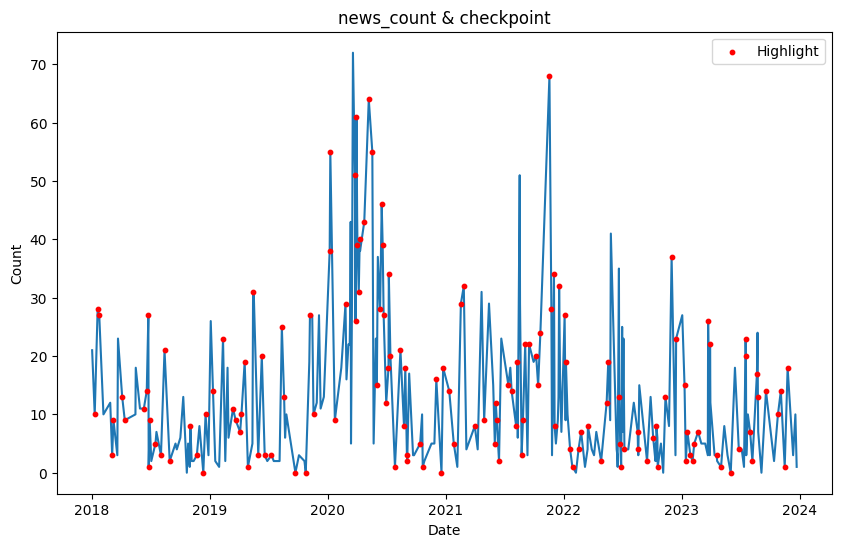

In [43]:
highlight_dates = stock_data['date']
highlight_counts = stock_data['news_count']

# 그래프 그리기
plt.figure(figsize=(10, 6))

# 주가 라인 플롯
sns.lineplot(data=check_count, x='date', y='count')

# 특정 날짜에 점으로 표시
plt.scatter(x=highlight_dates, y=highlight_counts, color='red', label='Highlight', zorder=3, s=10)

plt.title('news_count & checkpoint')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()


- 뉴스의 갯수 5개를 기준으로 일자를 나눠서 lda분석 진행
    + 5개 이상 발행된 날에 상승한 것은 뉴스의 양(노출도)도 포함되어 상승했을 것으로 예상
    + 5개 미만 발행된 날에 상승한 것은 뉴스의 효과가 매우 높았다 라고 가정 -> 이 기사들의 토픽이 상승에 매우 좋은 요인일 것

In [71]:
stock_data = stock_data.reset_index()
stock_data = stock_data.drop(columns='index')

In [86]:
# 이전 날짜와 당일 날짜의 뉴스 발행 5개 미만인 날짜 추출
five_news_date_index = stock_data.query('news_count < 5 & news_count != 0').index.tolist()

make_df = pd.DataFrame()

for i in five_news_date_index:
    if stock_data.iloc[i-1]['news_count'] < 5:
        make_df = pd.concat([make_df,stock_data.iloc[i:i+1,:]])

In [87]:
make_df

,_id,date,end_price,daily_change,start_price,high_price,low_price,trade,trade_checkpoint,price_checkpoint,re_trade_checkpoint,news_count
32,660cc16e6ca5177d63a420ba,2019-07-11,12150.0,+300,11900.0,12150.0,11900.0,27572.0,True,False,True,3
66,660cc12f6ca5177d63a41ef2,2020-09-03,21150.0,+750,20150.0,21400.0,19850.0,1040039.0,True,False,True,2
101,660cc0e06ca5177d63a41cc8,2022-01-28,20950.0,"+1,400",19650.0,20950.0,19500.0,389224.0,False,True,False,1
102,660cc0de6ca5177d63a41cb9,2022-02-15,20700.0,"+1,200",19500.0,22850.0,19250.0,4299151.0,True,True,True,4
111,660cc0c86ca5177d63a41c1c,2022-07-07,17250.0,+200,17200.0,17550.0,17100.0,53071.0,True,False,True,4
114,660cc0be6ca5177d63a41bd2,2022-09-15,15700.0,+100,15700.0,15750.0,15550.0,69790.0,True,False,True,2
125,660cc0a86ca5177d63a41b39,2023-02-03,14990.0,+80,14980.0,15120.0,14790.0,206263.0,True,False,True,2
131,660cc09b6ca5177d63a41ad9,2023-05-02,14300.0,+140,14170.0,14300.0,14060.0,69904.0,True,False,True,1
133,660cc0936ca5177d63a41aa0,2023-06-26,13120.0,+50,13010.0,13290.0,12910.0,63647.0,True,False,True,4


- 선별된 날짜에서 가장 많은 변화가 있었던 2020-09-03, 2022-01-28, 2022-02-15 3일의 뉴스들에 대한 LDA분석 진행

In [103]:
news_data['news_date'].describe()

count          17394
unique          1827
top       2018-07-26
freq             468
Name: news_date, dtype: object

In [108]:
# 'news_date' 열을 날짜 형식으로 변환
news_data['news_date'] = pd.to_datetime(news_data['news_date'])

# 해당 날짜의 데이터 필터링
filtered_data = news_data[(news_data['news_date'] == pd.to_datetime('2020-09-03')) |
                          (news_data['news_date'] == pd.to_datetime('2022-01-28')) |
                          (news_data['news_date'] == pd.to_datetime('2022-02-15'))]


In [109]:
filtered_data

,news_title,news_date,news_brand,news_contents,newText
9720,"'한글과컴퓨터' 52주 신고가 경신, 물 들어올 때 노 젓는 하반기 - 키움증권, ...",2020-09-03,한국경제,"◆ 최근 애널리스트 분석의견\n- 물 들어올 때 노 젓는 하반기 - 키움증권, BU...",한글과컴퓨터 주 신고가 경신 물 들어올 때 노 젓는 하반기 키움증권 ...
9721,"'한컴위드' 52주 신고가 경신, 최근 3일간 외국인 대량 순매도",2020-09-03,한국경제,◆ 주체별 매매동향\n- 최근 3일간 외국인 대량 순매도\n지난 한달을 기준으로 보...,한컴위드 주 신고가 경신 최근 일간 외국인 대량 순매도 주체별 매매동...
13805,2월 카카오뱅크·크래프톤 등 44개사 락업 풀려,2022-01-28,뉴시스,최근 1년간 월별 의무보유등록 해제 현황 *재판매 및 DB 금지\n\n[서울=뉴시스...,월 카카오뱅크 크래프톤 등 개사 락업 풀려 최근 년간 월별 의무보유등록 해제...
13852,"학생벤처 1세대 이한수 리탈코 대표 ""창업이 세상 바꿔..유니콘만 집중은 우려""",2022-02-15,지디넷코리아,"[인터뷰] 매출과 수익 구조 갖춰야..콜로세움, 골라라, 메디스태프 등에 투자 (지...",학생벤처 세대 이한수 리탈코 대표 창업이 세상 바꿔 유니콘만 집중은 우려 ...
13853,"[특징주] 한글과컴퓨터, 싸이월드 구글·애플에 심사 제출 소식에 상승세",2022-02-15,머니투데이,한글과컴퓨터가 싸이월드제트가 싸이월드 앱의 새 버전을 구글 플레이 스토어와 애플 앱...,특징주 한글과컴퓨터 싸이월드 구글 애플에 심사 제출 소식에 상승세 한글과컴퓨터...
13854,"추억의 싸이월드, '메타버스'로 돌아온다..관련주 들썩 (영상)",2022-02-15,파이낸셜뉴스,3D로 구현될 싸이월드 미니룸 구성화면. KBS 방송화면 캡처\n\n[파이낸셜뉴스]...,추억의 싸이월드 메타버스 로 돌아온다 관련주 들썩 영상 D로 구현될 싸이...
13855,싸이월드 메타버스로 돌아온다.. 관련주 들썩,2022-02-15,파이낸셜뉴스,싸이월드 앱 심사용 제출 소식\n브랜드 마케팅 플랫폼 성장 기대\n인트로메딕 주가 ...,싸이월드 메타버스로 돌아온다 관련주 들썩 싸이월드 앱 심사용 제출 소식 브랜드 ...


- LDA 머신러닝으로 돌리기에는 자료가 적어서 직관적 해석진행
    + 2020-09-03 : 52주 신고가 달성 기사만 있는 것으로 보아 테마주 or 마케팅이 아닌 다른 외부요인(실적 발표 등)이 작용한 것으로 판단
    + 2022-01-28 : 기사 내 한컴라이프케어(6개월 연장, 8월 예정) 즉, 락업이 연장되는 것이 주요 작용을 한것으로 예상
    + 2022-02-15 : 싸이월드에 관련된 기사가 많음, 해당 시기 메타버스 및 NFT의 주요 투자 시기였다는 것을 감안하면 메타버스 테마주로써 작용한 것으로 판단